In [1]:
#import modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#load data
data = pd.read_csv("data-final.csv", sep="\t")
data.head(10)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0
5,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,...,2016-03-03 02:03:12,1600.0,1000.0,4.0,196.0,3,1,SE,59.3333,18.05
6,4.0,3.0,4.0,3.0,3.0,3.0,5.0,3.0,4.0,3.0,...,2016-03-03 02:05:00,360.0,640.0,36.0,179.0,10,1,US,30.3322,-81.6556
7,3.0,1.0,5.0,2.0,5.0,2.0,5.0,2.0,3.0,2.0,...,2016-03-03 02:05:08,1440.0,900.0,15.0,210.0,17,1,MY,2.9927,101.7909
8,2.0,2.0,3.0,3.0,4.0,2.0,2.0,2.0,4.0,4.0,...,2016-03-03 02:05:27,2560.0,1440.0,2.0,181.0,4,1,GB,53.423,-2.2166
9,1.0,5.0,3.0,5.0,2.0,3.0,2.0,4.0,5.0,4.0,...,2016-03-03 02:08:06,1600.0,900.0,6.0,261.0,13,1,FI,60.1708,24.9375


In [ ]:
data.info()

In [ ]:
data.describe()

In [ ]:
len(data)

In [ ]:
#count missing values
data.isnull().values.sum()

In [2]:
#drop rows with missing values

df = data.copy()
df.dropna(inplace=True)

len(df)

1012050

In [ ]:
df.isnull().values.any()

In [3]:
df.rename(columns = {"lat_appx_lots_of_err":"lat_appx", "long_appx_lots_of_err":"long_appx"}, inplace=True)
df[["lat_appx", "long_appx"]].head(10)

,lat_appx,long_appx
0,51.5448,0.1991
1,3.1698,101.706
2,54.9119,-1.3833
3,51.75,-1.25
4,1.0,38.0
5,59.3333,18.05
6,30.3322,-81.6556
7,2.9927,101.7909
8,53.423,-2.2166
9,60.1708,24.9375


In [4]:
#group questions with column name 

ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}

In [5]:
#group columns for every type

EXT_col = [col for col in ext_questions.keys()]
EST_col = [col for col in est_questions.keys()]
AGR_col = [col for col in agr_questions.keys()]
CSN_col = [col for col in csn_questions.keys()]
OPN_col = [col for col in opn_questions.keys()]

In [ ]:
#plot answers for extroversion personality

plt.figure(figsize=(40,60))
for i in range(1, 11):
    plt.subplot(10,5,i)
    plt.hist(df[EXT_col[i-1]], color="red", bins=20, range=(1,5))
    plt.xticks([1,2,3,4,5])
    plt.title(ext_questions[EXT_col[i-1]], fontsize=20)

In [ ]:
#plot answers for neuroticism personality

plt.figure(figsize=(40,60))
for i in range(1, 11):
    plt.subplot(10,5,i)
    plt.hist(df[EST_col[i-1]], color="blue", bins=20, range=(1,5))
    plt.xticks([1,2,3,4,5])
    plt.title(est_questions[EST_col[i-1]], fontsize=20)

In [ ]:
#plot answers for agreeable personality

plt.figure(figsize=(40,60))
for i in range(1, 11):
    plt.subplot(10,5,i)
    plt.hist(df[AGR_col[i-1]], color="green", bins=20, range=(1,5))
    plt.xticks([1,2,3,4,5])
    plt.title(agr_questions[AGR_col[i-1]], fontsize=20)

In [ ]:
#plot answers for conscientious personality

plt.figure(figsize=(40,60))
for i in range(1, 11):
    plt.subplot(10,5,i)
    plt.hist(df[CSN_col[i-1]], color="orange", bins=20, range=(1,5))
    plt.xticks([1,2,3,4,5])
    plt.title(csn_questions[CSN_col[i-1]], fontsize=20)

In [ ]:
#plot answers for open personality

plt.figure(figsize=(40, 60))
for i in range(1, 11):
    plt.subplot(10,5,i)
    plt.hist(df[OPN_col[i-1]], color="black", bins=20, range=(1,5))
    plt.xticks([1,2,3,4,5])
    plt.title(opn_questions[OPN_col[i-1]], fontsize=20)

In [6]:
#group positively and negatively keyed questions

positiv_questions = ['EXT1', 'EXT3', 'EXT5', 'EXT7', 'EXT9',
                    'EST1', 'EST3', 'EST5', 'EST6', 'EST7', 
                    'EST8', 'EST9', 'EST10',
                    'AGR2', 'AGR4', 'AGR6', 'AGR8', 'AGR9', 'AGR10',
                    'CSN1', 'CSN3', 'CSN5', 'CSN7', 'CSN9', 'CSN10', 
                    'OPN1', 'OPN3', 'OPN5', 'OPN7', 'OPN8', 'OPN9', 
                    'OPN10']

negative_questions = ['EXT2', 'EXT4', 'EXT6', 'EXT8', 'EXT10',
                    'EST2', 'EST4',
                    'AGR1', 'AGR3', 'AGR5', 'AGR7', 
                    'CSN2', 'CSN4', 'CSN6', 'CSN8', 
                    'OPN2', 'OPN4', 'OPN6']

In [7]:
#reverse values of negative questions

df.loc[:, negative_questions] = 6 - df.loc[:, negative_questions]
df.head(10)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx,long_appx
0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,1.0,3.0,2.0,3.0,3.0,2.0,1.0,1.0,1.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,2.0,3.0,4.0,1.0,3.0,2.0,1.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,4.0,2.0,3.0,4.0,4.0,2.0,2.0,1.0,2.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,1.0,3.0,2.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0
5,3.0,3.0,4.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,...,2016-03-03 02:03:12,1600.0,1000.0,4.0,196.0,3,1,SE,59.3333,18.05
6,4.0,3.0,4.0,3.0,3.0,3.0,5.0,3.0,4.0,3.0,...,2016-03-03 02:05:00,360.0,640.0,36.0,179.0,10,1,US,30.3322,-81.6556
7,3.0,5.0,5.0,4.0,5.0,4.0,5.0,4.0,3.0,4.0,...,2016-03-03 02:05:08,1440.0,900.0,15.0,210.0,17,1,MY,2.9927,101.7909
8,2.0,4.0,3.0,3.0,4.0,4.0,2.0,4.0,4.0,2.0,...,2016-03-03 02:05:27,2560.0,1440.0,2.0,181.0,4,1,GB,53.423,-2.2166
9,1.0,1.0,3.0,1.0,2.0,3.0,2.0,2.0,5.0,2.0,...,2016-03-03 02:08:06,1600.0,900.0,6.0,261.0,13,1,FI,60.1708,24.9375


In [ ]:
# creating a new data frame to reduce the dimensions for every catagory

df_sums = pd.DataFrame()
df_sums['extroversion'] = df[EXT_col].sum(axis=1)/10
df_sums['neurotic'] = df[EST_col].sum(axis=1)/10
df_sums['agreeable'] = df[AGR_col].sum(axis=1)/10
df_sums['conscientious'] = df[CSN_col].sum(axis=1)/10
df_sums['open'] = df[OPN_col].sum(axis=1)/10

In [ ]:
# plot histograms for every category

for col in df_sums.columns:
    print(col.upper())
    sns.histplot(df_sums[col])
    plt.show()
    print()

In [ ]:
# creating heatmaps to visualize the correlations between each category (using 3 different methods)

meths = ['pearson', 'spearman', 'kendall']

for meth in meths:
    print(meth.upper())
    corrm= df_sums.corr(method=meth)
    sns.heatmap(corrm, annot=True)
    plt.show()
    print()

In [ ]:
from sklearn.cluster import KMeans

# new data frame that just includes the answers on the questions
df_model = df_sums.copy()

In [ ]:
# using the elbow method to determine the best number of clusters for K-Means

wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_model)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# creating a model and fitting it with the data 

kmeans = KMeans(n_clusters=5)
km_fitted = kmeans.fit(df_model)

In [ ]:
# adding the column cluster to the data frame

df_model.loc[:, 'Cluster'] = km_fitted.labels_
df_model.head(10)

In [ ]:
#count the rows for every cluster

df_model.Cluster.value_counts()

In [ ]:
# visualize the amount in a countplot

sns.countplot(data=df_model, x='Cluster')

In [ ]:
# displaying the mean for every catagory in each cluster

df_model.groupby('Cluster').mean()

In [ ]:
# ploting pairplots of each catagory (be aware that the calculation takes a lot of time!!!)

sns.pairplot(df_model, hue="Cluster", palette="bright")

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_model['Country_cat'] = df['country']
le = LabelEncoder()

le.fit(df_model['Country_cat'])
df_model.loc[:, 'Country_num'] = le.transform(df_model['Country_cat'])

df_model.head(10)

In [ ]:
from sklearn.model_selection import train_test_split

df_model_classification = df_model.copy()

X = df_model_classification.drop(columns=['Country_num', 'Country_cat'])
y = df_model_classification['Country_num']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

y_prediction = decision_tree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_prediction))

In [ ]:
from sklearn.linear_model import RidgeClassifier

ridge = RidgeClassifier()
ridge.fit(X_train,y_train)

y_prediction2 = ridge.predict(X_test)
print(accuracy_score(y_test, y_prediction2))

In [ ]:
# calculating the total time answering the questions (in minutes) 

df_model_regression = df_model_classification.drop(columns=['Country_num', 'Country_cat'])

df_model_regression['total_time_min'] = round(df[df.columns.tolist()[50:100]].sum(axis=1)/60000, 2)
df_model_regression.head()

In [ ]:
X = df_model_regression.drop(columns=['total_time_min'])
y = df_model_regression['total_time_min']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score, explained_variance_score

sgd = SGDRegressor()
sgd.fit(X_train,y_train)

y_prediction = sgd.predict(X_test)
print(r2_score(y_test, y_prediction)) 
print(explained_variance_score(y_test, y_prediction)) 

In [ ]:
# plot location of people who attend the survey

import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point

# get coordinates

lat_cor = pd.to_numeric(df['lat_appx'], errors='coerce')
long_cor = pd.to_numeric(df['long_appx'], errors='coerce')

# transform coordinates to use them with geopandas, load geopandas world map

geometry = [Point(xy) for xy in zip(long_cor, lat_cor)]
gdf = GeoDataFrame(df, geometry=geometry)
geo_file = gpd.datasets.get_path('naturalearth_lowres')

# create the plot 

world = gpd.read_file(geo_file)
world_ax = world.drop(159).plot(figsize=(60, 10))
gdf.plot(ax=world_ax, marker='o', color='red', markersize=1);

In [ ]:
# checking in which countries more than 2500 residents participated
count_countries = pd.DataFrame(df['country'].value_counts())
representive_countries = count_countries[count_countries['country'] >= 2500]
representive_countries

#creating a list with all the representive countries
list_representive_countries = list(representive_countries.to_dict()['country'].keys())
list_representive_countries

In [ ]:
df_countries = df_sums.copy()
df_countries['country'] = df['country']

df_countries

In [ ]:
representative_countries_df = df_countries.loc[df_countries['country'].isin(list_representive_countries)]
len(representative_countries_df)

In [ ]:
# displaying the mean for every catagory in each country

country_means_per_category = representative_countries_df.groupby('country').mean() 
country_means_per_category

In [ ]:
print(country_means_per_category.loc[country_means_per_category['extroversion'].idxmax()])
print()
print(country_means_per_category.loc[country_means_per_category['extroversion'].idxmin()])

In [ ]:
print(country_means_per_category.loc[country_means_per_category['neurotic'].idxmax()])
print()
print(country_means_per_category.loc[country_means_per_category['neurotic'].idxmin()])

In [ ]:
print(country_means_per_category.loc[country_means_per_category['agreeable'].idxmax()])
print()
print(country_means_per_category.loc[country_means_per_category['agreeable'].idxmin()])

In [ ]:
print(country_means_per_category.loc[country_means_per_category['conscientious'].idxmax()])
print()
print(country_means_per_category.loc[country_means_per_category['conscientious'].idxmin()])

In [ ]:
print(country_means_per_category.loc[country_means_per_category['open'].idxmax()])
print()
print(country_means_per_category.loc[country_means_per_category['open'].idxmin()])

In [ ]:
# creating heatmaps to visualize the correlations between each category (using 3 different methods)

meths = ['pearson', 'spearman', 'kendall']

for meth in meths:
    print(meth.upper())
    corrm= country_means_per_category.corr(method=meth)
    sns.heatmap(corrm, annot=True)
    plt.show()
    print()

In [ ]:
#plot countries with more than 10.000 participants

countries = pd.DataFrame(df['country'].value_counts())
countries_10k = countries[countries['country'] >= 10000]

sns.barplot(data=countries_10k, x=countries_10k.index, y='country')

In [8]:
#filter to get only US citizens and checking the length
Df_US = df['country'] == 'US'
Dataset_USA = df[Df_US]
Dataset_USA.head(2)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx,long_appx
6,4.0,3.0,4.0,3.0,3.0,3.0,5.0,3.0,4.0,3.0,...,2016-03-03 02:05:00,360.0,640.0,36.0,179.0,10,1,US,30.3322,-81.6556
21,3.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,1.0,3.0,...,2016-03-03 02:22:02,1366.0,768.0,8.0,305.0,17,1,US,34.1073,-118.3719


In [9]:
#creating a column for the time of the day, the survey was uploaded

Dataset_USA['time'] = Dataset_USA.dateload.str[11:13].astype(int)
Dataset_USA.head()

<ipython-input-9-4ef00f7fe74e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset_USA['time'] = Dataset_USA.dateload.str[11:13].astype(int)


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx,long_appx,time
6,4.0,3.0,4.0,3.0,3.0,3.0,5.0,3.0,4.0,3.0,...,360.0,640.0,36.0,179.0,10,1,US,30.3322,-81.6556,2
21,3.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,1.0,3.0,...,1366.0,768.0,8.0,305.0,17,1,US,34.1073,-118.3719,2
51,1.0,4.0,3.0,2.0,3.0,3.0,2.0,1.0,1.0,1.0,...,1366.0,768.0,24.0,179.0,14,1,US,36.2082,-86.879,2
71,3.0,2.0,1.0,2.0,3.0,4.0,2.0,2.0,3.0,1.0,...,1366.0,768.0,15.0,265.0,16,1,US,37.2965,-79.9878,3
100,3.0,4.0,5.0,3.0,4.0,4.0,4.0,3.0,3.0,3.0,...,768.0,1024.0,13.0,176.0,12,1,US,38.0,-97.0,3


In [10]:
#clustering the new daytime column into the categories 'night', 'morning', 'noon', 'evening'

daytime_categories = ['night','morning', 'noon', 'evening']
daytime_categories

['night', 'morning', 'noon', 'evening']

In [11]:
intervals = [0, 6, 12, 18, 24]
intervals  

[0, 6, 12, 18, 24]

In [14]:
Dataset_USA['daytime'] = pd.cut(x=Dataset_USA['time'],
                                    bins=intervals,
                                    labels=daytime_categories,
                                    include_lowest=True)
Dataset_USA.head(10)

<ipython-input-14-2852facc43f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset_USA['daytime'] = pd.cut(x=Dataset_USA['time'],


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx,long_appx,time,daytime
6,4.0,3.0,4.0,3.0,3.0,3.0,5.0,3.0,4.0,3.0,...,640.0,36.0,179.0,10,1,US,30.3322,-81.6556,2,night
21,3.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,1.0,3.0,...,768.0,8.0,305.0,17,1,US,34.1073,-118.3719,2,night
51,1.0,4.0,3.0,2.0,3.0,3.0,2.0,1.0,1.0,1.0,...,768.0,24.0,179.0,14,1,US,36.2082,-86.879,2,night
71,3.0,2.0,1.0,2.0,3.0,4.0,2.0,2.0,3.0,1.0,...,768.0,15.0,265.0,16,1,US,37.2965,-79.9878,3,night
100,3.0,4.0,5.0,3.0,4.0,4.0,4.0,3.0,3.0,3.0,...,1024.0,13.0,176.0,12,1,US,38.0,-97.0,3,night
104,3.0,5.0,5.0,2.0,5.0,4.0,3.0,2.0,4.0,4.0,...,640.0,57.0,306.0,13,1,US,40.6826,-73.467,3,night
113,4.0,3.0,1.0,3.0,3.0,5.0,4.0,1.0,3.0,1.0,...,667.0,11.0,226.0,5,1,US,38.0,-97.0,4,night
117,2.0,2.0,3.0,2.0,4.0,3.0,2.0,3.0,2.0,3.0,...,1080.0,8.0,118.0,10,2,US,40.7601,-73.6957,4,night
143,3.0,5.0,4.0,4.0,4.0,4.0,3.0,3.0,4.0,3.0,...,732.0,3.0,294.0,8,1,US,25.7743,-80.1937,4,night
151,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,...,1080.0,28.0,145.0,22,1,US,40.6695,-73.8726,4,night


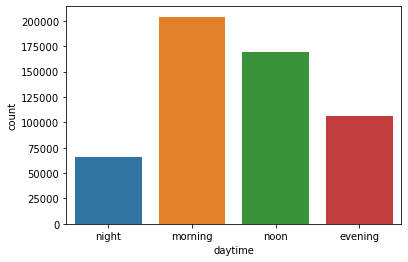

In [13]:
sns.countplot(data= Dataset_USA, x = Dataset_USA['daytime'] )

In [15]:
# creating a new USA data frame to reduce the dimensions and compare the answers in relation to the daytime
col_list = list(Dataset_USA)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]


df_sums_daytime = pd.DataFrame()
df_sums_daytime['extroversion'] = Dataset_USA[ext].sum(axis=1)/10
df_sums_daytime['neurotic'] = Dataset_USA[est].sum(axis=1)/10
df_sums_daytime['agreeable'] = Dataset_USA[agr].sum(axis=1)/10
df_sums_daytime['conscientious'] = Dataset_USA[csn].sum(axis=1)/10
df_sums_daytime['open'] = Dataset_USA[opn].sum(axis=1)/10
df_sums_daytime['daytime'] = Dataset_USA['daytime']


# displaying the mean for every catagory in each cluster
df_sums_daytime.groupby('daytime').mean()

,extroversion,neurotic,agreeable,conscientious,open
daytime,,,,,
night,2.962203,3.046351,3.771819,3.350247,3.878174
morning,3.042272,3.016163,3.836100,3.433713,3.846230
noon,2.968883,3.012550,3.832047,3.437154,3.904138
evening,2.911523,3.077329,3.795693,3.331708,3.934900


In [ ]:
import reverse_geocoder as rg 

latitudesUS = Dataset_USA['lat_appx'].tolist()
longitudesUS = Dataset_USA['long_appx'].tolist()

coordinates = zip(latitudesUS,longitudesUS)

coordinates = list(coordinates)

coordinates 

In [ ]:
def reverseGeocode(x):
    result = rg.search(x)
    return result

reverseGeocode((40.4301,-74.0985))

In [ ]:
def reverseGeocode(x):
    result = rg.search(x)
    return result


states = []
for state in reverseGeocode(coordinates):
    states.append(state['admin1'])
    
states

In [ ]:
Dataset_USA['state'] = states
Dataset_USA.head()

In [ ]:
US_states = pd.DataFrame(Dataset_USA['state'].value_counts())
states_10k = US_states[US_states['state'] >= 10000]

plt.figure(figsize=(30,20))
plt.tick_params(axis='x', labelsize=25)
plt.title('US participant - State Split', fontsize= 30)
plt.xticks(rotation=90)
sns.barplot(data=states_10k, x=states_10k.index, y='state')
plt.ylabel("Count", fontsize = 15)
plt.xlabel('States', fontsize= 30)



In [ ]:
positive_longitudes = Dataset_USA['long_appx'].astype(float).abs()
latitudes_for_regionsplit = latitudesUS = Dataset_USA['lat_appx'].tolist()

coordinates = zip(latitudes_for_regionsplit, positive_longitudes)

regions = []

for c in coordinates:
    if float(c[0]) < 36 and 80 < float(c[1]) < 110:
        regions.append('southern state')
    elif float(c[0]) > 42 and 80 < float(c[1]) < 115:
        regions.append('northern state')
    elif float(c[1]) < 83:
        regions.append('east coast')
    elif float(c[1]) > 117:
        regions.append('west coast')
    else:
        regions.append('landlocked')
        
        
regions

In [ ]:
Dataset_USA['region'] = regions
Dataset_USA.head()

In [ ]:
plt.figure(figsize=(30,20))
plt.tick_params(axis='x', labelsize=25)
plt.title('US participant - Region Split', fontsize= 30)


sns.countplot(data= Dataset_USA, x = Dataset_USA['region'], palette = "nipy_spectral_r")   #"Set1_r"
plt.xlabel('US-Region', fontsize= 30)
plt.ylabel('Count', fontsize= 15)

In [ ]:
Dataset_USA['state'].unique()

In [ ]:
Dataset_USA.drop(Dataset_USA.loc[Dataset_USA['state']== 'Baja California'].index, inplace=True)
Dataset_USA.drop(Dataset_USA.loc[Dataset_USA['state']== 'New Brunswick'].index, inplace=True)
Dataset_USA.drop(Dataset_USA.loc[Dataset_USA['state']== 'British Columbia'].index, inplace=True)
Dataset_USA.drop(Dataset_USA.loc[Dataset_USA['state']== 'Manitoba'].index, inplace=True)
Dataset_USA.drop(Dataset_USA.loc[Dataset_USA['state']== 'Western'].index, inplace=True)
Dataset_USA['state'].unique()

In [ ]:
democratics = ['California', 'Tennessee', 'New York', 'Maine', 'New Jersey',
                    'Missouri', 'Arkansas', 'Connecticut', 'Michigan', 'Minnesota', 
                    'New Hampshire', 'Ohio', 'Colorado',
                    'Wisconsin', 'Nevada', 'Illinois', 'Maryland', 'Georgia', 'Washington, D.C.',
                    'Pennsylvania', 'Delaware', 'Hawaii', 'Kentucky', 'Louisiana', 'Oregon', 
                    'Vermont', 'New Mexico', 'Rhode Island', 'Idaho', 'West Virginia']

republicans = ['Florida', 'Virginia', 'Kansas', 'South Carolina', 'Texas',
                    'Mississippi', 'North Carolina',
                    'Arizona', 'Indiana', 'Oklahoma', 'South Dakota', 
                    'Alaska', 'Utah', 'Nebraska', 'Wyoming', 
                    'Baja California', 'North Dakota', 'Montana','Alabama']

In [ ]:
states = Dataset_USA['state']
political_bias = []
for s in states:
    if s in democratics:
        political_bias.append('blue')
    else:
        political_bias.append('red') 


Dataset_USA['political bias'] = political_bias 
Dataset_USA.head(10)


#not mature yet.. as you can see in the output

In [ ]:
plt.figure(figsize=(10,5))
plt.tick_params(axis='x', labelsize=17)
plt.title('US participant - Democratics vs. Republicans', fontsize= 20)
plt.xlabel('political bias', fontsize= 20)

sns.countplot(data= Dataset_USA, x = Dataset_USA['political bias'], palette = ['#FF0000', '#0000FF'])

In [ ]:
Examine_locations = Dataset_USA[['region','political bias']]
Examine_locations.head(10)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

d = defaultdict(LabelEncoder)
Examine_locations_transformed = Examine_locations.apply(lambda x: d[x.name].fit_transform(x))

Examine_locations_transformed.head(10)

In [ ]:
df_us_sums = pd.DataFrame()

df_us_sums['extroversion'] = Dataset_USA[EXT_col].sum(axis=1)/10
df_us_sums['neurotic'] = Dataset_USA[EST_col].sum(axis=1)/10
df_us_sums['agreeable'] = Dataset_USA[AGR_col].sum(axis=1)/10
df_us_sums['conscientious'] = Dataset_USA[CSN_col].sum(axis=1)/10
df_us_sums['open'] = Dataset_USA[OPN_col].sum(axis=1)/10
df_us_sums['political bias'] = Dataset_USA['political bias']
df_us_sums['region'] = Dataset_USA['region']

In [ ]:
for region in df_us_sums['region'].unique():
    df_loop = df_us_sums.loc[df_us_sums['region'] == region]
    i = 1
    plt.figure(figsize=(40,60))
    for col in df_loop.drop(columns = ['region', 'political bias']).columns:
        #sns.histplot(df_sums[col])
        #plt.show()
        plt.subplot(10,5,i)
        plt.hist(df_loop[col], color="blue", bins=20)
        plt.title(col.upper() + ' ' + region, fontsize=30)
        i = i+1

In [ ]:
for bias in df_us_sums['political bias'].unique():
    df_loop = df_us_sums.loc[df_us_sums['political bias'] == bias]
    i = 1
    plt.figure(figsize=(40,60))
    for col in df_loop.drop(columns = ['region', 'political bias']).columns:
        #sns.histplot(df_sums[col])
        #plt.show()
        plt.subplot(10,5,i)
        plt.hist(df_loop[col], color= bias, bins=20)
        plt.title(col.upper() + ' ' + bias, fontsize=30)
        i = i+1

In [ ]:
# for integer encoding using sklearn
from sklearn.preprocessing import LabelEncoder

# Encoding the variable
le = LabelEncoder()

le.fit(df_us_sums['political bias'])
df_us_sums.loc[:, 'pb_numeric'] = le.transform(df_us_sums['political bias'])

df_us_sums.head(10)

In [ ]:
from sklearn.model_selection import train_test_split

X = df_us_sums.drop(columns=['political bias','pb_numeric', 'region'])
y = df_us_sums['pb_numeric']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

y_prediction = decision_tree.predict(X_test)

In [ ]:
print(classification_report(y_test, y_prediction))
print(confusion_matrix(y_test, y_prediction))   
print("Accuracy:",accuracy_score(y_test, y_prediction))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

randomforest_classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy')
randomforest_classifier.fit(X_train, y_train)

In [ ]:
y_prediction = randomforest_classifier.predict(X_test)
    
print(classification_report(y_test, y_prediction))
print(confusion_matrix(y_test, y_prediction))   
print("Accuracy:",accuracy_score(y_test, y_prediction))

In [ ]:
cm = confusion_matrix(y_test, y_prediction)
sns.heatmap(cm, annot=True)

In [ ]:
# for integer encoding using sklearn
from sklearn.preprocessing import LabelEncoder

# Encoding the variable
le = LabelEncoder()

le.fit(df_us_sums['region'])
df_us_sums.loc[:, 'reg_numeric'] = le.transform(df_us_sums['region'])

df_us_sums.head(10)

In [ ]:
from sklearn.model_selection import train_test_split

X = df_us_sums.drop(columns=['political bias', 'region', 'reg_numeric'])
y = df_us_sums['reg_numeric']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

decision_tree_clf = DecisionTreeClassifier(max_depth = 6, random_state = 0)
decision_tree_clf.fit(X_train,y_train)

y_predict_test = decision_tree_clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict_test))
print(confusion_matrix(y_test, y_predict_test))   
print("Accuracy:",accuracy_score(y_test, y_predict_test))
print()

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

decision_tree_clf = DecisionTreeClassifier(max_depth = 6, random_state = 0)
decision_tree_clf.fit(X_train,y_train)

y_predict_test = decision_tree_clf.predict(X_test)

In [ ]:

#evaluation
from sklearn import metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict_test))
print(confusion_matrix(y_test, y_predict_test))   
print("Accuracy:",metrics.accuracy_score(y_test, y_predict_test))

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
# creating df which is reduced to the eight most special questions
modern_habits = ['EXT2', 'EXT3','EXT5', 'AGR2', 'OPN1', 'OPN3', 'OPN4', 'OPN9', 'region', 'political bias']
reduced_df_USA =  Dataset_USA[heavy_statements]
reduced_df_USA.head()


In [ ]:
le = LabelEncoder()

le.fit(reduced_df_USA['region'])
reduced_df_USA.loc[:, 'reg_numeric'] = le.transform(reduced_df_USA['region'])
le.fit(reduced_df_USA['political bias'])
reduced_df_USA.loc[:, 'bias_numeric'] = le.transform(reduced_df_USA['political bias'])

reduced_df_USA.head(10)

Regions
east coast = 0
landlocked = 1
northern state = 2
southern state = 3
west coast = 4

Political bias
blue = 0
red = 1




In [ ]:
# looking at the means of every answer grouped by the target political bias
reduced_df_USA.drop(['political bias','reg_numeric', 'bias_numeric'], axis = 1).groupby('region').mean()



In [ ]:
reduced_df_USA.drop(['region','reg_numeric', 'bias_numeric'], axis = 1).groupby('political bias').mean()

In [ ]:
#train_test-split
from sklearn.model_selection import train_test_split

X = reduced_df_USA.drop(columns=['region','political bias', 'bias_numeric'], axis=1)
y = reduced_df_USA['reg_numeric']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


In [ ]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

decision_tree_clf = DecisionTreeClassifier(max_depth = 6, random_state = 0)
decision_tree_clf.fit(X_train,y_train)

y_predict_test = decision_tree_clf.predict(X_test)

In [ ]:
from sklearn import metrics
#evaluation
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict_test))
print(confusion_matrix(y_test, y_predict_test))   
print("Accuracy:",metrics.accuracy_score(y_test, y_predict_test))

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)


In [ ]:
from sklearn.model_selection import train_test_split

X = reduced_df_USA.drop(columns=['region','political bias', 'reg_numeric'], axis=1)
y = reduced_df_USA['bias_numeric']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


In [ ]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

decision_tree_clf = DecisionTreeClassifier(max_depth = 6, random_state = 0)
decision_tree_clf.fit(X_train,y_train)

y_predict_test = decision_tree_clf.predict(X_test)

In [ ]:

#evaluation
from sklearn import metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict_test))
print(confusion_matrix(y_test, y_predict_test))   
print("Accuracy:",metrics.accuracy_score(y_test, y_predict_test))

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

decision_tree_clf = DecisionTreeClassifier(max_depth = 6, random_state = 0)
decision_tree_clf.fit(X_train,y_train)

y_predict_test = decision_tree_clf.predict(X_test)

In [ ]:

#evaluation
from sklearn import metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict_test))
print(confusion_matrix(y_test, y_predict_test))   
print("Accuracy:",metrics.accuracy_score(y_test, y_predict_test))

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
conservative_habits = ['EST1', 'EST5','EST6','AGR3','AGR5', 'OPN7', 'OPN9', 'region','political bias']
reduced_df_USA2 = Dataset_USA[conservative_habits]
reduced_df_USA2.head()

In [ ]:
le = LabelEncoder()

le.fit(reduced_df_USA2['region'])
reduced_df_USA2.loc[:, 'reg_numeric'] = le.transform(reduced_df_USA2['region'])
le.fit(reduced_df_USA2['political bias'])
reduced_df_USA2.loc[:, 'bias_numeric'] = le.transform(reduced_df_USA2['political bias'])

reduced_df_USA2.head(10)

In [ ]:
reduced_df_USA2.drop(['political bias','reg_numeric', 'bias_numeric'], axis = 1).groupby('region').mean()

In [ ]:
reduced_df_USA.drop(['region','reg_numeric', 'bias_numeric'], axis = 1).groupby('political bias').mean()

In [ ]:
from sklearn.model_selection import train_test_split

X = reduced_df_USA2.drop(columns=['region','political bias', 'bias_numeric'], axis=1)
y = reduced_df_USA2['reg_numeric']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


In [ ]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

decision_tree_clf = DecisionTreeClassifier(max_depth = 6, random_state = 0)
decision_tree_clf.fit(X_train,y_train)

y_predict_test = decision_tree_clf.predict(X_test)

In [ ]:

#evaluation
from sklearn import metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict_test))
print(confusion_matrix(y_test, y_predict_test))   
print("Accuracy:",metrics.accuracy_score(y_test, y_predict_test))

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn.model_selection import train_test_split

X = reduced_df_USA2.drop(columns=['region','political bias', 'reg_numeric'], axis=1)
y = reduced_df_USA2['bias_numeric']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


In [ ]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

decision_tree_clf = DecisionTreeClassifier(max_depth = 6, random_state = 0)
decision_tree_clf.fit(X_train,y_train)

y_predict_test = decision_tree_clf.predict(X_test)

In [ ]:

#evaluation
from sklearn import metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict_test))
print(confusion_matrix(y_test, y_predict_test))   
print("Accuracy:",metrics.accuracy_score(y_test, y_predict_test))

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)